In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns


In [10]:
# Load the dataset
df = pd.read_csv("stackoverflow_full.csv")
df=df.dropna() #drop null values
df.drop(["Unnamed: 0"], inplace = True, axis =1 )
df.drop(columns = 'HaveWorkedWith', inplace=True) #mostly redundant with computerskills, it would be useful if I was breaking things down by individual programming languages
df = df[df['Gender'] != 'NonBinary'] 
df.isnull().sum()



Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
ComputerSkills    0
Employed          0
dtype: int64

In [23]:
# Encode categorical variables
label_encoders = {}
for col in ['Age', 'Accessibility', 'MentalHealth', 'EdLevel', 'Gender', 'MainBranch', 'Country']:  
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future transformations


df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed
0,0,0,0,1,0,0,0,7,4,146,51552.0,4,0
1,0,0,4,1,0,0,0,12,5,141,46482.0,12,1
2,0,0,0,1,0,0,0,15,6,54,77290.0,7,0
3,0,0,4,1,0,0,0,9,6,27,46135.0,13,0
4,1,0,3,0,0,0,1,40,30,135,160932.0,2,0


In [25]:
# Define new predictor variables (excluding non-significant ones)
significant_predictors = ['EdLevel', 'Gender', 'YearsCodePro', 'PreviousSalary']

# Define new independent variable set
X = df[significant_predictors]
y = df['Employed']


## Box Plot

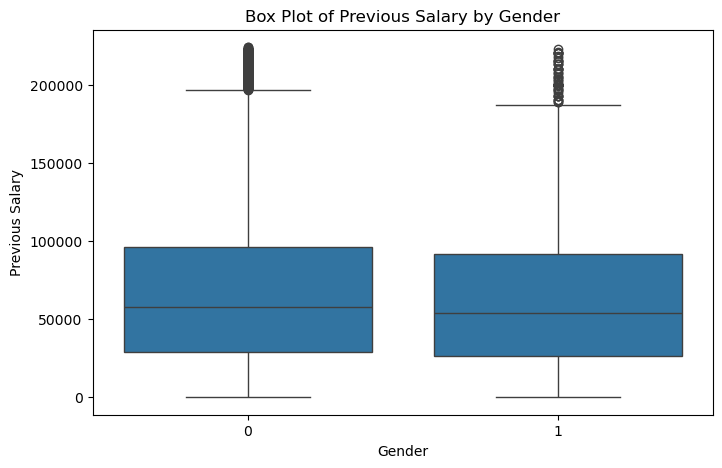

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Gender"], y=df["PreviousSalary"])
plt.title("Box Plot of Previous Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Previous Salary")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68521.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for Male Salaries: p-value = 0.0000
Shapiro-Wilk test for Female Salaries: p-value = 0.0000


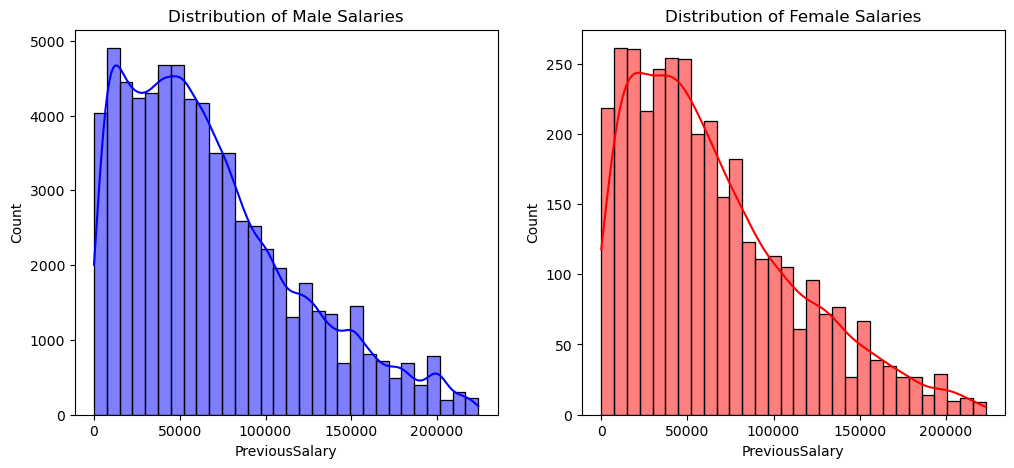

In [36]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Separate salaries by gender
male_salaries = df[df["Gender"] == 0]["PreviousSalary"]
female_salaries = df[df["Gender"] == 1]["PreviousSalary"]

# Shapiro-Wilk normality test
shapiro_male = stats.shapiro(male_salaries)
shapiro_female = stats.shapiro(female_salaries)

print(f"Shapiro-Wilk test for Male Salaries: p-value = {shapiro_male.pvalue:.4f}")
print(f"Shapiro-Wilk test for Female Salaries: p-value = {shapiro_female.pvalue:.4f}")

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(male_salaries, bins=30, kde=True, color="blue")
plt.title("Distribution of Male Salaries")

plt.subplot(1, 2, 2)
sns.histplot(female_salaries, bins=30, kde=True, color="red")
plt.title("Distribution of Female Salaries")

plt.show()


In [38]:
# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(male_salaries, female_salaries, alternative='two-sided')

# Print results
print(f"Mann-Whitney U test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant difference in salaries between genders.")
else:
    print("No statistically significant difference in salaries between genders.")


Mann-Whitney U test p-value: 0.0004
Statistically significant difference in salaries between genders.


C:\Users\NegimaSonic\AppData\Local\Temp\ipykernel_25696\2551345857.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_salaries, label="Male", shade=True, color="blue")
C:\Users\NegimaSonic\AppData\Local\Temp\ipykernel_25696\2551345857.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_salaries, label="Female", shade=True, color="red")


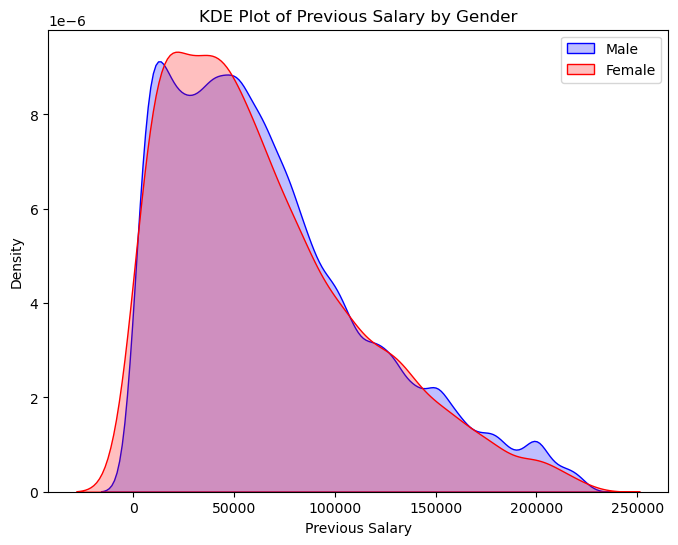

In [40]:
plt.figure(figsize=(8, 6))
sns.kdeplot(male_salaries, label="Male", shade=True, color="blue")
sns.kdeplot(female_salaries, label="Female", shade=True, color="red")
plt.title("KDE Plot of Previous Salary by Gender")
plt.xlabel("Previous Salary")
plt.ylabel("Density")
plt.legend()
plt.show()



## Correlation Matrix

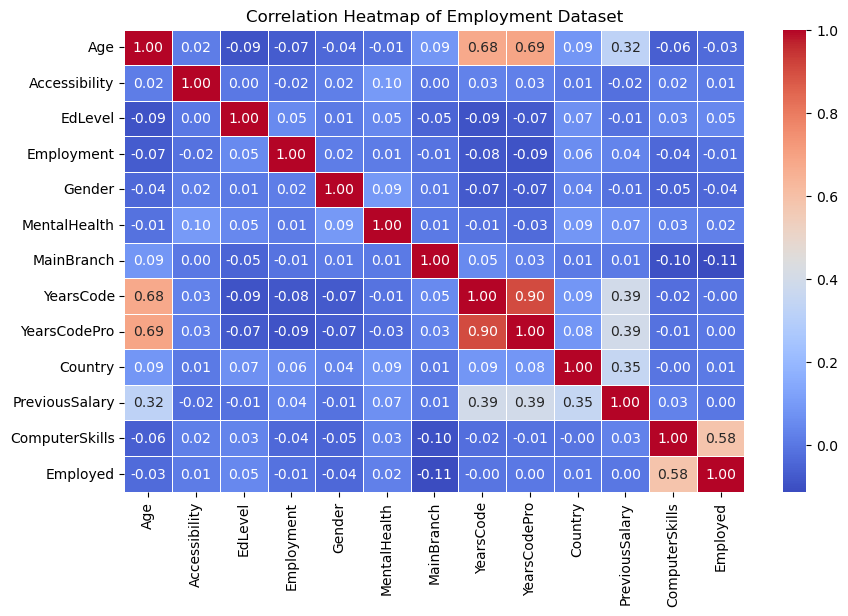

In [43]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Employment Dataset")

# Show plot
plt.show()

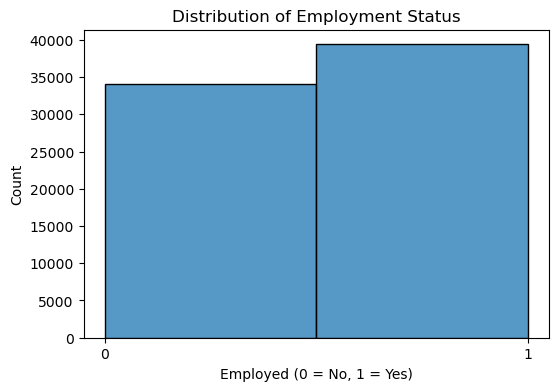

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Employed"], bins=2, kde=False)
plt.title("Distribution of Employment Status")
plt.xlabel("Employed (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()


In [49]:
# resetting the dataset to allow the next ones to use the full range of gender

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("stackoverflow_full.csv")
df=df.dropna() #drop null values
df.drop(["Unnamed: 0"], inplace = True, axis =1 )
df.drop(columns = 'HaveWorkedWith', inplace=True) #mostly redundant with computerskills, it would be useful if I was breaking things down by individual programming languages

df.isnull().sum()



# Encode categorical variables
label_encoders = {}
for col in ['Age', 'Accessibility', 'MentalHealth', 'EdLevel', 'Gender', 'MainBranch', 'Country']:  
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future transformations


df.head()

# Define new predictor variables (excluding non-significant ones)
significant_predictors = ['Age', 'Accessibility', 'MentalHealth', 'EdLevel', 'Gender', 'MainBranch', 'Country', 'ComputerSkills', 'YearsCodePro', 'PreviousSalary']

# Define new independent variable set
X = df[significant_predictors]
y = df['Employed']

# Constant term for the intercept
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Random forest

Random Forest Classifier Accuracy: 0.7653


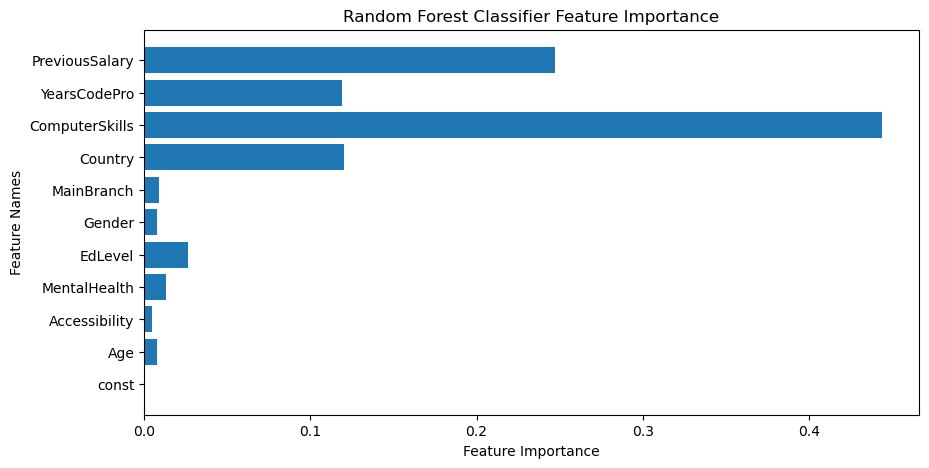

In [52]:


y_class = df["Employed"]  # Employed (1) or not (0)


# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train_class, y_test_class = train_test_split(X_scaled, y_class, test_size=0.2, random_state=0)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
rf_classifier.fit(X_train, y_train_class)

# Predictions
y_pred_class = rf_classifier.predict(X_test)

# Classification Accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")
# Feature Importance Plot for Classification Model
plt.figure(figsize=(10, 5))
plt.barh(X.columns, rf_classifier.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Random Forest Classifier Feature Importance")
plt.show()
